In [ ]:
#This dataset contains detailed records of coffee sales from a vending machine.
#The dataset is from March 2024, capturing daily transaction data. In this notebook, I have used EDA to discover the customer's
#purchasing patterns,sales trends, and customer preferences related to coffee products which can aid in the inventory planning.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r"C:\Users\shamzkha\Documents\coffee sales.csv")

In [3]:
data.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [4]:
data.tail()

,date,datetime,cash_type,card,money,coffee_name
1128,2024-07-31,2024-07-31 20:53:35.077,card,ANON-0000-0000-0443,23.02,Cortado
1129,2024-07-31,2024-07-31 20:59:25.013,card,ANON-0000-0000-0040,27.92,Americano with Milk
1130,2024-07-31,2024-07-31 21:26:26.000,card,ANON-0000-0000-0444,32.82,Latte
1131,2024-07-31,2024-07-31 21:54:11.824,card,ANON-0000-0000-0445,32.82,Latte
1132,2024-07-31,2024-07-31 21:55:16.570,card,ANON-0000-0000-0446,32.82,Latte


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
money,1133.0,33.105808,5.035366,18.12,28.9,32.82,37.72,40.0


In [7]:
data.loc[:,['cash_type','card','coffee_name']].describe().T

,count,unique,top,freq
cash_type,1133,2,card,1044
card,1044,446,ANON-0000-0000-0012,88
coffee_name,1133,8,Americano with Milk,268


In [8]:
#cash_type:

#Count: 1133 total entries in the dataset.
#Unique: There are 2 different types of cash transactions (cash and card payments).
#Top: The most common payment method is "card."
#Freq: The "card" payment method was used 1044 times, which is the most frequent.

In [9]:
#card:

#Count: 1044 total entries (this corresponds to the number of card transactions).
#Unique: There are 446 unique customer identifiers who made payments using a card.
#Top: The most frequent customer identifier for card transactions is "ANON-0000-0000-0012."
#Freq: The identifier "ANON-0000-0000-0012" made card payments 88 times.

In [10]:
#coffee_name:

#Count: 1133 total coffee orders.
#Unique: There are 8 different types of coffee being ordered.
#Top: The most popular coffee type is "Americano with Milk."
#Freq: The "Americano with Milk" was ordered 268 times, the highest frequency.
#Conclusion: "Americano with Milk" is the favorite coffee choice, significantly more popular than the other 7 coffee options.

In [11]:
#checking the transactions with missing value in 'card'.
data[data['card'].isnull()]['cash_type'].value_counts()

cash_type
cash    89
Name: count, dtype: int64

In [12]:
#All of the transactions with null 'card' information are from cash users.

<Axes: >

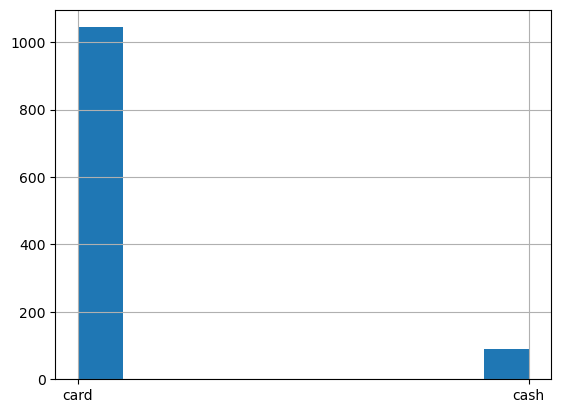

In [13]:
data['cash_type'].hist()

In [14]:
data['cash_type'].value_counts(normalize=True)

cash_type
card    0.921447
cash    0.078553
Name: proportion, dtype: float64

In [15]:
#92% of the transactions are from card users.

In [16]:
pd.DataFrame(data['coffee_name'].value_counts(normalize=True).sort_values(ascending=False).round(3)*100)

,proportion
coffee_name,
Americano with Milk,23.7
Latte,21.4
Cappuccino,17.3
Americano,14.9
Cortado,8.7
Hot Chocolate,6.5
Espresso,4.3
Cocoa,3.1


In [17]:
# Conclusion
#Americano with Milk and Latte are most popular coffee products. 
#Cortado, Hot Chocolate,Espresso, and Cocoa are less popular.

In [18]:
#Convert date and datetime to datetime format
data['date']=pd.to_datetime(data['date'])
data['datetime']=pd.to_datetime(data['datetime'])

In [19]:
#Create column of Month, Weekdays, and Hours

In [20]:
data['month']=data['date'].dt.strftime('%Y-%m')
data['day']=data['date'].dt.strftime('%w')
data['hour']=data['datetime'].dt.strftime('%H')

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1133 non-null   datetime64[ns]
 1   datetime     1133 non-null   datetime64[ns]
 2   cash_type    1133 non-null   object        
 3   card         1044 non-null   object        
 4   money        1133 non-null   float64       
 5   coffee_name  1133 non-null   object        
 6   month        1133 non-null   object        
 7   day          1133 non-null   object        
 8   hour         1133 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 79.8+ KB


In [22]:
data.head()

,date,datetime,cash_type,card,money,coffee_name,month,day,hour
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,2024-03,5,10
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,2024-03,5,12
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,2024-03,5,12
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,2024-03,5,13
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,2024-03,5,13


In [23]:
#checking overall revenue by products
revenue_data=data.groupby(['coffee_name']).sum(['money']).reset_index().sort_values(by='money',ascending=False)

Text(0.5, 0, 'Revenue')

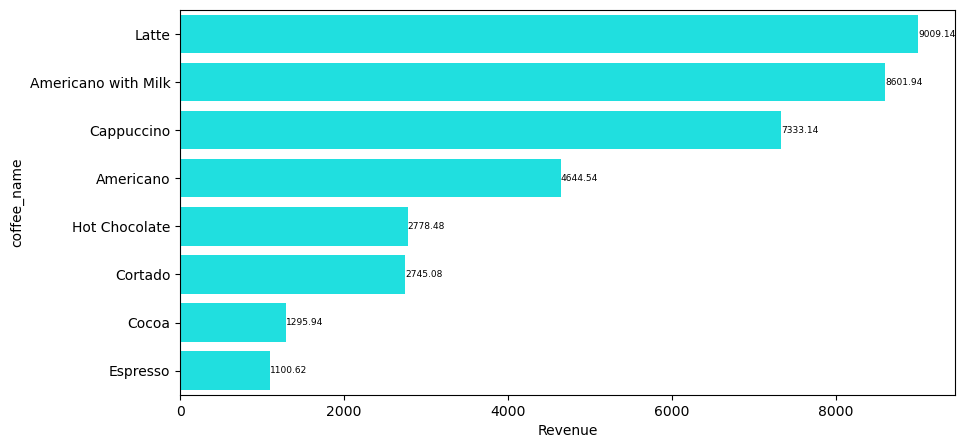

In [86]:
plt.figure(figsize=(10,5))
ax =sns.barplot(data=revenue_data,x='money',y='coffee_name',color='cyan')
ax.bar_label(ax.containers[0],fontsize=6.5)
plt.xlabel('Revenue')

In [25]:
#Latte is the product with the highest revenue of 9009.14, while Expresso is the  with lowest revenue 0f 1100.

In [26]:
#Monthly Sales
monthly_sales=data.groupby(['coffee_name','month']).count()['date'].reset_index().rename(columns={'date':'count'}).pivot(index='month',columns='coffee_name',values='count').reset_index()
monthly_sales

coffee_name,month,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,2024-03,36,34,20,6,30,10,22,48
1,2024-04,35,42,43,6,19,7,13,31
2,2024-05,48,58,55,9,17,8,14,58
3,2024-06,14,69,46,5,19,10,14,50
4,2024-07,36,65,32,9,14,14,11,56


In [27]:
monthly_sales.describe().T.loc[:,['min','max']]

,min,max
coffee_name,,
Americano,14.0,48.0
Americano with Milk,34.0,69.0
Cappuccino,20.0,55.0
Cocoa,5.0,9.0
Cortado,14.0,30.0
Espresso,7.0,14.0
Hot Chocolate,11.0,22.0
Latte,31.0,58.0


([<matplotlib.axis.XTick at 0x1c04e1406e0>,
 [Text(0, 0, '2024-03'),
  Text(1, 0, '2024-04'),
  Text(2, 0, '2024-05'),
  Text(3, 0, '2024-06'),
  Text(4, 0, '2024-07')])

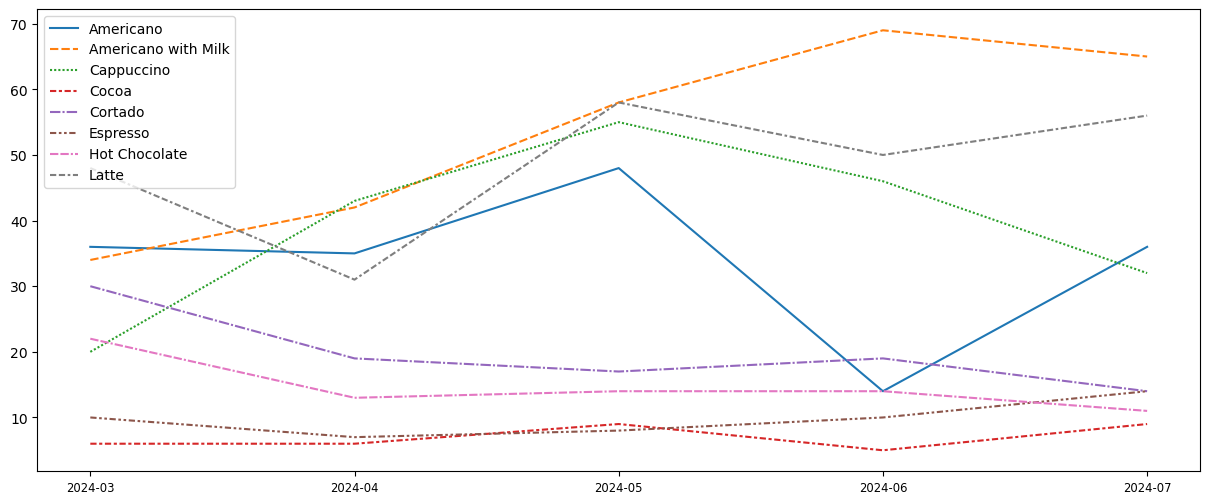

In [28]:
plt.figure(figsize=(15,6))
sns.lineplot(data=monthly_sales)
plt.legend(loc='upper left')
plt.xticks(range(len(monthly_sales['month'])),monthly_sales['month'],size='small')

In [29]:
#Americano with Milk and Latte show an upward trend.

In [30]:
weekday_sales=data.groupby(['day']).count()['date'].reset_index().rename(columns={'date':'count'})
weekday_sales

,day,count
0,0,151
1,1,151
2,2,185
3,3,165
4,4,164
5,5,163
6,6,154


([<matplotlib.axis.XTick at 0x1c04e2b05c0>,
 [Text(0, 0, 'Sun'),
  Text(1, 0, 'Mon'),
  Text(2, 0, 'Tue'),
  Text(3, 0, 'Wed'),
  Text(4, 0, 'Thur'),
  Text(5, 0, 'Fri'),
  Text(6, 0, 'Sat')])

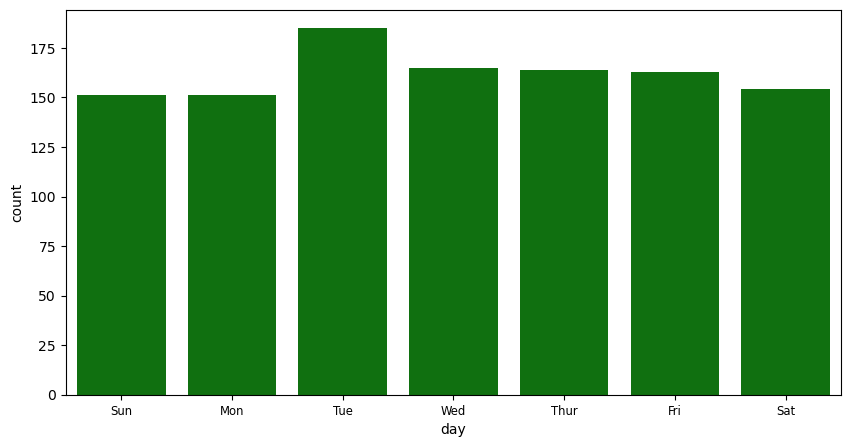

In [31]:
plt.figure(figsize=(10,5))
sns.barplot(data=weekday_sales,x='day',y='count',color='green')
plt.xticks(range(len(weekday_sales['day'])),['Sun','Mon','Tue','Wed','Thur','Fri','Sat'],size='small')

In [32]:
#The bar chart shows that Tuesday has the highest sales of the week, while sales on the other days are relatively close to one another.

In [33]:
daily_sales=data.groupby(['coffee_name','date']).count()['datetime'].reset_index().reset_index().rename(columns={'datetime':'count'}).pivot(index='date',columns='coffee_name',values='count').reset_index().fillna(0)
daily_sales

coffee_name,date,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,2024-03-01,1.0,4.0,0.0,1.0,0.0,0.0,3.0,2.0
1,2024-03-02,3.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2024-03-03,1.0,2.0,0.0,1.0,2.0,0.0,2.0,2.0
3,2024-03-04,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0
4,2024-03-05,0.0,0.0,0.0,1.0,1.0,0.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...
145,2024-07-27,0.0,5.0,4.0,0.0,0.0,2.0,0.0,2.0
146,2024-07-28,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
147,2024-07-29,3.0,2.0,2.0,1.0,0.0,0.0,2.0,1.0
148,2024-07-30,2.0,12.0,2.0,0.0,3.0,2.0,0.0,3.0


In [34]:
daily_sales.iloc[:,1:].describe().T.loc[:,['min','max']]

,min,max
coffee_name,,
Americano,0.0,5.0
Americano with Milk,0.0,12.0
Cappuccino,0.0,9.0
Cocoa,0.0,2.0
Cortado,0.0,4.0
Espresso,0.0,4.0
Hot Chocolate,0.0,4.0
Latte,0.0,7.0


In [35]:
#This table provides us the infomation of how many of each products can be sold in each day.

In [36]:
hourly_sales=data.groupby(['hour']).count()['date'].reset_index().rename(columns={'date':'count'})
hourly_sales

,hour,count
0,07,13
1,08,44
2,09,50
3,10,133
4,11,103
5,12,87
6,13,78
7,14,76
8,15,65
9,16,77


<Axes: xlabel='hour', ylabel='count'>

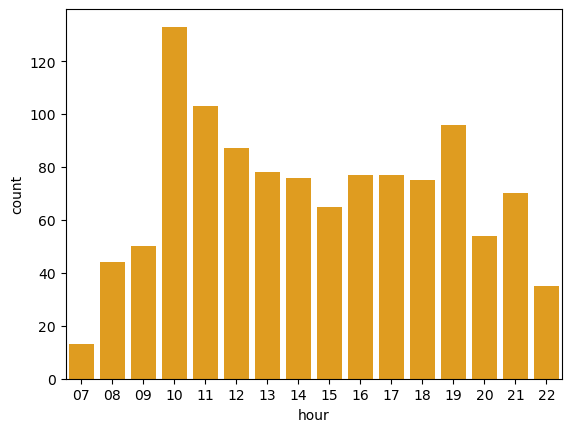

In [37]:
sns.barplot(data=hourly_sales,x='hour',y='count',color='orange')

In [38]:
#Overall, two peak hours within each day can be observed around 10:00am and 7:00pm.

In [39]:
#From the analysis above, we have uncovered valuable insights into customer shopping patterns on a daily and weekly basis. We have identified the most popular coffee products and observed the shopping trends over time. These
#findings are instrumental in optimizing inventory planning, designing the layout of vending machines, and determining the ideal restock times for coffee products.